In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ── Global Color Palette (coffee-themed) ──
BROWN = '#6F4E37'
TAN   = '#C4A882'
CREAM = '#FFF8F0'
DARK  = '#3B2314'
RED   = '#C0392B'
GREEN = '#27AE60'

plt.rcParams.update({
    'font.family':          'DejaVu Sans',
    'axes.facecolor':       CREAM,
    'figure.facecolor':     'white',
    'axes.spines.top':      False,
    'axes.spines.right':    False,
})

print('✅ Libraries imported successfully')

✅ Libraries imported successfully


In [2]:
# ── Load ──────────────────────────────────────────────────────────────────────
df = pd.read_csv('coffee-prices-historical-chart-data.csv')
df.columns = ['date', 'price_usd']

# ── Parse dates ───────────────────────────────────────────────────────────────
df['date'] = pd.to_datetime(df['date'])

# ── Drop rows with no price (empty rows at end of file) ───────────────────────
df = df.dropna(subset=['price_usd'])

# ── Feature Engineering ───────────────────────────────────────────────────────
df['year']       = df['date'].dt.year
df['month']      = df['date'].dt.month
df['month_name'] = df['date'].dt.strftime('%b')
df['decade']     = (df['year'] // 10) * 10

# ── Preview ───────────────────────────────────────────────────────────────────
print(f'Shape: {df.shape}')
print(f'Date range: {df["date"].min().date()} → {df["date"].max().date()}')
print(f'Price range: ${df["price_usd"].min():.4f} → ${df["price_usd"].max():.4f}')
df.head()

Shape: (12147, 6)
Date range: 1973-08-20 → 2022-01-21
Price range: $0.4250 → $3.3563


,date,price_usd,year,month,month_name,decade
0,1973-08-20,0.6735,1973,8,Aug,1970
1,1973-08-21,0.6710,1973,8,Aug,1970
2,1973-08-22,0.6580,1973,8,Aug,1970
3,1973-08-23,0.6675,1973,8,Aug,1970
4,1973-08-24,0.6660,1973,8,Aug,1970


In [3]:
# ── Check for nulls ───────────────────────────────────────────────────────────
print('Null values:')
print(df.isnull().sum())

# ── Basic statistics ──────────────────────────────────────────────────────────
df['price_usd'].describe().round(4)

Null values:
date          0
price_usd     0
year          0
month         0
month_name    0
decade        0
dtype: int64


count    12147.0000
mean         1.2673
std          0.4789
min          0.4250
25%          0.9485
50%          1.2370
75%          1.4700
max          3.3563
Name: price_usd, dtype: float64

In [4]:
# ── Save cleaned file ─────────────────────────────────────────────────────────
df.to_csv('coffee_prices_clean.csv', index=False)
print('✅ Cleaned CSV saved as coffee_prices_clean.csv')

✅ Cleaned CSV saved as coffee_prices_clean.csv


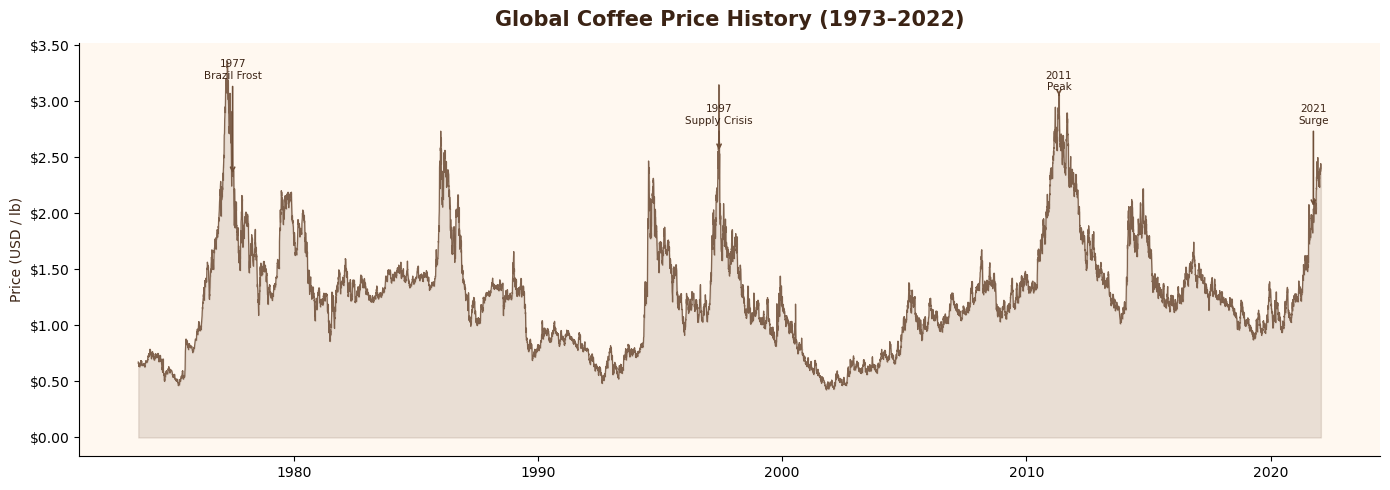

In [5]:
fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(df['date'], df['price_usd'], color=BROWN, linewidth=0.9, alpha=0.85)
ax.fill_between(df['date'], df['price_usd'], alpha=0.15, color=BROWN)

# ── Annotate key events ───────────────────────────────────────────────────────
events = {
    '1977\nBrazil Frost':  ('1977-07-01', 3.2),
    '1997\nSupply Crisis': ('1997-06-01', 2.8),
    '2011\nPeak':          ('2011-05-01', 3.1),
    '2021\nSurge':         ('2021-10-01', 2.8),
}
for label, (d, y) in events.items():
    actual_price = df.loc[df['date'] >= d, 'price_usd'].iloc[0]
    ax.annotate(label, xy=(pd.Timestamp(d), actual_price),
                xytext=(pd.Timestamp(d), y), fontsize=7.5, ha='center', color=DARK,
                arrowprops=dict(arrowstyle='->', color=BROWN, lw=1.2))

ax.set_title('Global Coffee Price History (1973–2022)', fontsize=15, fontweight='bold', color=DARK, pad=12)
ax.set_ylabel('Price (USD / lb)', color=DARK)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:.2f}'))
plt.tight_layout()
plt.savefig('chart1_full_history.png', dpi=150, bbox_inches='tight')
plt.show()

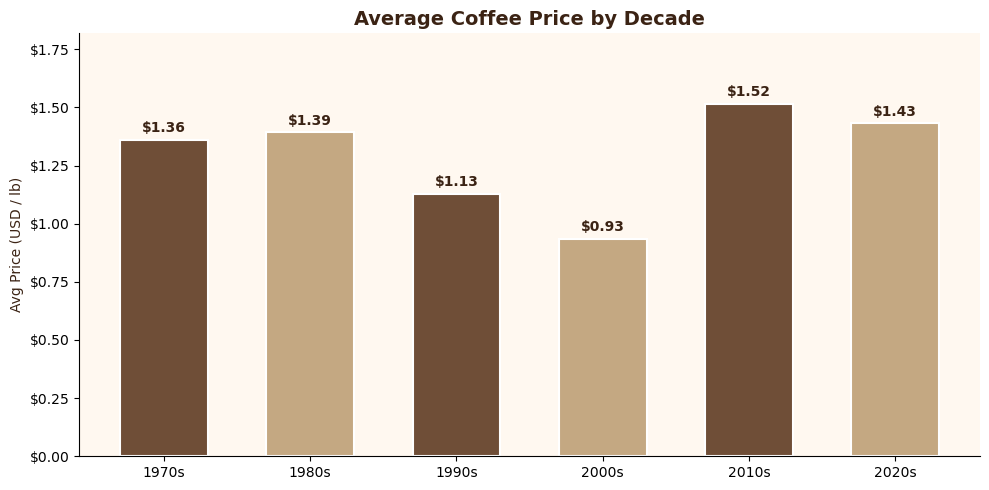

Decade  Avg ($)  Min ($)  Max ($)
 1970s 1.361773   0.4630   3.3563
 1980s 1.392425   0.6870   2.7345
 1990s 1.129393   0.4825   3.1480
 2000s 0.934267   0.4250   1.6755
 2010s 1.515249   0.8705   3.0615
 2020s 1.431277   0.9365   2.4985


In [6]:
decade_avg = df.groupby('decade')['price_usd'].agg(['mean', 'min', 'max']).reset_index()
decade_avg['label'] = decade_avg['decade'].astype(str) + 's'

fig, ax = plt.subplots(figsize=(10, 5))
bar_colors = [BROWN if i % 2 == 0 else TAN for i in range(len(decade_avg))]
bars = ax.bar(decade_avg['label'], decade_avg['mean'], color=bar_colors, width=0.6,
              edgecolor='white', linewidth=1.5)

for bar, val in zip(bars, decade_avg['mean']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
            f'${val:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=10, color=DARK)

ax.set_title('Average Coffee Price by Decade', fontsize=14, fontweight='bold', color=DARK)
ax.set_ylabel('Avg Price (USD / lb)', color=DARK)
ax.set_ylim(0, decade_avg['mean'].max() * 1.2)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:.2f}'))
plt.tight_layout()
plt.savefig('chart2_decade_avg.png', dpi=150, bbox_inches='tight')
plt.show()

print(decade_avg[['label', 'mean', 'min', 'max']].rename(
    columns={'label': 'Decade', 'mean': 'Avg ($)', 'min': 'Min ($)', 'max': 'Max ($)'}
).to_string(index=False))

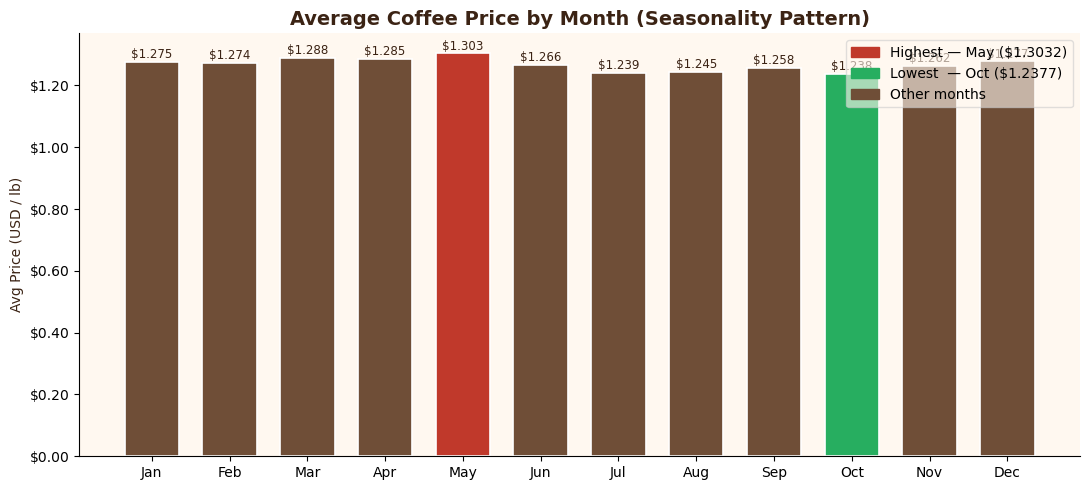

In [7]:
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly = df.groupby('month_name')['price_usd'].mean().reindex(month_order)

fig, ax = plt.subplots(figsize=(11, 5))
bar_colors = [RED if v == monthly.max() else (GREEN if v == monthly.min() else BROWN) for v in monthly.values]
bars = ax.bar(monthly.index, monthly.values, color=bar_colors, width=0.7, edgecolor='white', linewidth=1.2)

for bar, val in zip(bars, monthly.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.003,
            f'${val:.3f}', ha='center', va='bottom', fontsize=8.5, color=DARK)

ax.set_title('Average Coffee Price by Month (Seasonality Pattern)', fontsize=14, fontweight='bold', color=DARK)
ax.set_ylabel('Avg Price (USD / lb)', color=DARK)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:.2f}'))

legend = [mpatches.Patch(color=RED,   label=f'Highest — {monthly.idxmax()} (${monthly.max():.4f})'),
          mpatches.Patch(color=GREEN, label=f'Lowest  — {monthly.idxmin()} (${monthly.min():.4f})'),
          mpatches.Patch(color=BROWN, label='Other months')]
ax.legend(handles=legend, loc='upper right', framealpha=0.6)
plt.tight_layout()
plt.savefig('chart3_seasonality.png', dpi=150, bbox_inches='tight')
plt.show()

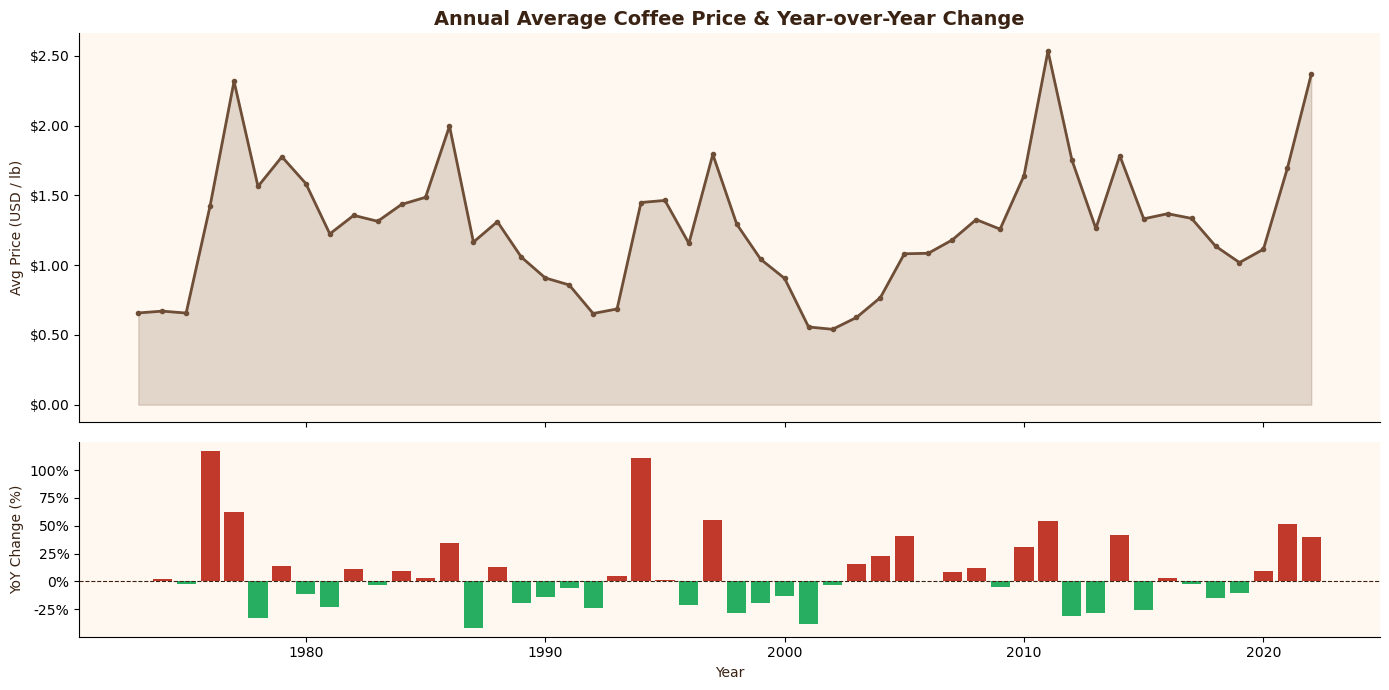

🔺 Top 5 Biggest Annual Price Increases:
year
1976    +117.1%
1994    +111.2%
1977     +62.6%
1997     +55.2%
2011     +54.3%
Name: price_usd, dtype: object

🔻 Top 5 Biggest Annual Price Drops:
year
1987    -41.6%
2001    -38.4%
1978    -32.5%
2012    -30.8%
2013    -28.0%
Name: price_usd, dtype: object


In [8]:
yearly = df.groupby('year')['price_usd'].mean()
yoy    = yearly.pct_change() * 100

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), sharex=True,
                                 gridspec_kw={'height_ratios': [2, 1]})

# Top — price trend
ax1.plot(yearly.index, yearly.values, color=BROWN, linewidth=2, marker='o', markersize=3)
ax1.fill_between(yearly.index, yearly.values, alpha=0.2, color=BROWN)
ax1.set_title('Annual Average Coffee Price & Year-over-Year Change', fontsize=14, fontweight='bold', color=DARK)
ax1.set_ylabel('Avg Price (USD / lb)', color=DARK)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:.2f}'))

# Bottom — YoY % change
bar_colors = [RED if v > 0 else GREEN for v in yoy.dropna()]
ax2.bar(yoy.dropna().index, yoy.dropna().values, color=bar_colors, width=0.8)
ax2.axhline(0, color=DARK, linewidth=0.8, linestyle='--')
ax2.set_ylabel('YoY Change (%)', color=DARK)
ax2.set_xlabel('Year', color=DARK)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.tight_layout()
plt.savefig('chart4_yoy.png', dpi=150, bbox_inches='tight')
plt.show()

# Top 5 biggest gains & drops
print('🔺 Top 5 Biggest Annual Price Increases:')
print(yoy.nlargest(5).map(lambda x: f'+{x:.1f}%'))
print('\n🔻 Top 5 Biggest Annual Price Drops:')
print(yoy.nsmallest(5).map(lambda x: f'{x:.1f}%'))

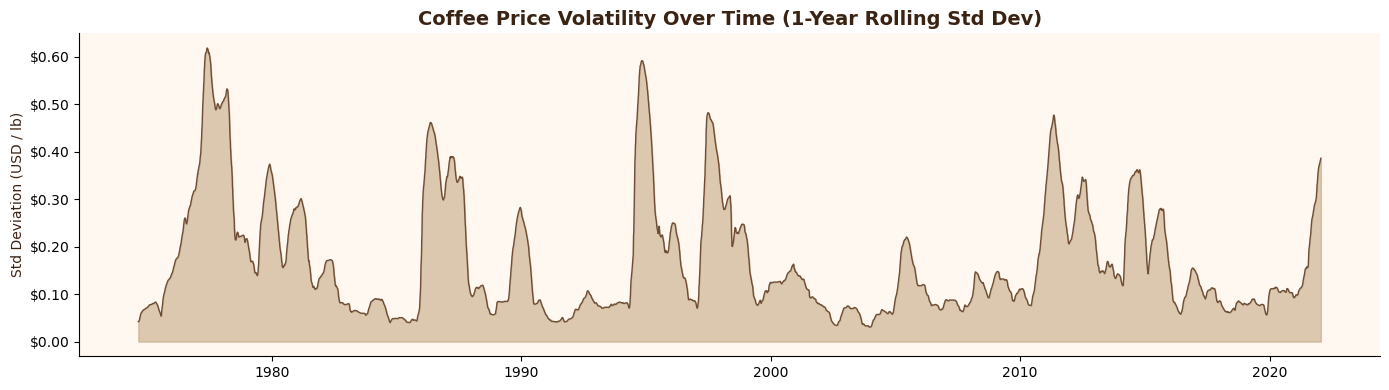

In [9]:
df_sorted = df.sort_values('date').copy()

# 252 trading days ≈ 1 year of volatility window
df_sorted['rolling_std']  = df_sorted['price_usd'].rolling(window=252).std()
df_sorted['rolling_mean'] = df_sorted['price_usd'].rolling(window=252).mean()

fig, ax = plt.subplots(figsize=(14, 4))
ax.fill_between(df_sorted['date'], df_sorted['rolling_std'], alpha=0.6, color=TAN)
ax.plot(df_sorted['date'], df_sorted['rolling_std'], color=BROWN, linewidth=1)
ax.set_title('Coffee Price Volatility Over Time (1-Year Rolling Std Dev)',
             fontsize=14, fontweight='bold', color=DARK)
ax.set_ylabel('Std Deviation (USD / lb)', color=DARK)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:.2f}'))
plt.tight_layout()
plt.savefig('chart5_volatility.png', dpi=150, bbox_inches='tight')
plt.show()

In [10]:
summary = {
    'Metric':  ['All-Time High', 'All-Time Low', 'Overall Average', 'Median Price',
                 'Std Deviation', 'Best Year (avg)', 'Worst Year (avg)',
                 'Best Month', 'Worst Month'],
    'Value': [
        f"${df['price_usd'].max():.4f} ({df.loc[df['price_usd'].idxmax(), 'date'].date()})",
        f"${df['price_usd'].min():.4f} ({df.loc[df['price_usd'].idxmin(), 'date'].date()})",
        f"${df['price_usd'].mean():.4f}",
        f"${df['price_usd'].median():.4f}",
        f"${df['price_usd'].std():.4f}",
        f"{yearly.idxmax()} (${yearly.max():.4f})",
        f"{yearly.idxmin()} (${yearly.min():.4f})",
        f"{monthly.idxmax()} (${monthly.max():.4f})",
        f"{monthly.idxmin()} (${monthly.min():.4f})",
    ]
}

pd.DataFrame(summary).set_index('Metric')

,Value
Metric,
All-Time High,$3.3563 (1977-04-14)
All-Time Low,$0.4250 (2001-10-22)
Overall Average,$1.2673
Median Price,$1.2370
Std Deviation,$0.4789
Best Year (avg),2011 ($2.5338)
Worst Year (avg),2002 ($0.5400)
Best Month,May ($1.3032)
Worst Month,Oct ($1.2377)
